In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

### Preparing the dataset
    Use only the following columns:

    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'

In [34]:
columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[columns]

print(df.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


### Exploratory Data Analysis (EDA)

In [35]:
df.fuel_efficiency_mpg.describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

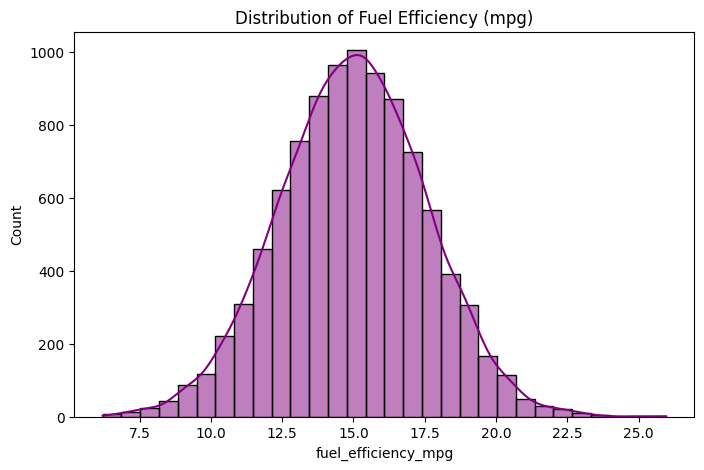

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df.fuel_efficiency_mpg, bins=30, kde=True, color='purple')
plt.title("Distribution of Fuel Efficiency (mpg)")
plt.xlabel("fuel_efficiency_mpg")
plt.ylabel("Count")
plt.show()

Yes, fuel_efficiency_mpg variable has a long tail

### Question 1

    There's one column with missing values. What is it?

    'engine_displacement'
    'horsepower'
    'vehicle_weight'
    'model_year'

In [37]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### The column with missing values is horsepower.

### Question 2
    What's the median (50% percentile) for variable 'horsepower'?

    49
    99
    149
    199

In [38]:
# Summary statistics for horsepower
print(df['horsepower'].describe())

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64


In [39]:
print(df['horsepower'].median())

149.0


### Prepare and split the dataset
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use the same code as in the lectures

In [40]:
#  Shuffle the dataset
np.random.seed(42)
indices = np.arange(len(df))
np.random.shuffle(indices)

df = df.iloc[indices].reset_index(drop=True)

#  Split into train (60%), val (20%), test (20%)
n = len(df)
n_train = int(0.6 * n)
n_val   = int(0.2 * n)
n_test  = n - n_train - n_val

df_train = df.iloc[:n_train].copy()
df_val   = df.iloc[n_train:n_train + n_val].copy()
df_test  = df.iloc[n_train + n_val:].copy()

#  Check the sizes
print(len(df_train), len(df_val), len(df_test))

5822 1940 1942


In [41]:
# Separate target variable (fuel_efficiency_mpg)
y_train = df_train.fuel_efficiency_mpg.values
y_val   = df_val.fuel_efficiency_mpg.values
y_test  = df_test.fuel_efficiency_mpg.values

# Remove the target column from the input DataFrames
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


### Question 3
    We need to deal with missing values for the column from Q1.

    We have two options: fill it with 0 or with the mean of this variable.

    Try both options. For each, train a linear regression model without regularization using the code from the lessons.

    For computing the mean, use the training only!

    Use the validation dataset to evaluate the models and compare the RMSE of each option.

    Round the RMSE scores to 2 decimal digits using round(score, 2)

    Which option gives better RMSE?

In [ ]:
# Linear regression from the lessons
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

In [43]:
# using numeric columns

base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# prepare the matrix X
def prepare_X(df):
    X = df[base].values
    return X


#### Option 1: Fill Missing horsepower with 0

In [44]:
df_train_0 = df_train.copy()
df_val_0   = df_val.copy()

df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower']   = df_val_0['horsepower'].fillna(0)

# Prepare matrices
X_train_0 = prepare_X(df_train_0)
X_val_0   = prepare_X(df_val_0)

# Train model
w0_0, w_0 = train_linear_regression(X_train_0, y_train)

# Predict on validation
y_pred_0 = w0_0 + X_val_0.dot(w_0)

# Compute RMSE
rmse_0 = rmse(y_val, y_pred_0)
print("RMSE (fill with 0):", round(rmse_0, 2))


RMSE (fill with 0): 0.52
